In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.config import ParamLimits
from pyloki.simulation.pulse import PulseSignalConfig

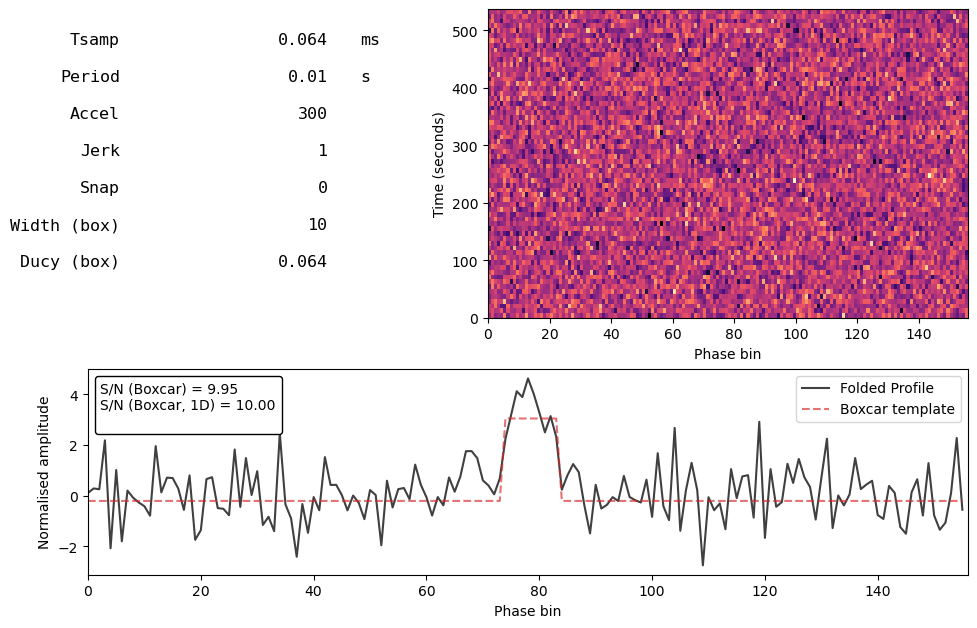

In [2]:
pulsar_period = 0.010
dt = 64e-6
accel = 300
jerk = 1
nsamps = 2**23
mod_kwargs = {"acc": accel, "jerk": jerk}
cfg = PulseSignalConfig(
    period=pulsar_period,
    dt=dt,
    nsamps=nsamps,
    snr=10,
    ducy=0.1,
    mod_kwargs=mod_kwargs,
)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
eta = 2
nbins = 64
p = ParamLimits.from_upper([jerk, accel, cfg.freq], (-1.5, 1.5), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 128
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=p.limits,
    bseg_brute=bseg_brute,
    ducy_max=0.2,
    wtsp=1.5,
    nthreads=8,
    use_fourier=False,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

Param limits: [(np.float64(-1.5), np.float64(1.5)), (np.float64(-102.65318400000001), np.float64(702.653184)), (np.float64(99.95511100138201), np.float64(100.04488899861799))]
[2026-01-07 21:01:01.696] [info] FFA Memory Usage: 2.83 GB + 0.04 GB (coords)
[2026-01-07 21:01:01.815] [info] FFA::execute started
[2026-01-07 21:01:01.875] [info] FFA::initialize started
[2026-01-07 21:01:01.880] [info] FFA::initialize took 5 ms
[2026-01-07 21:01:01.912] [info] FFA::execute took 96 ms


In [4]:
true_values = {
    "jerk": cfg.mod_kwargs["jerk"],
    "accel": cfg.mod_kwargs["acc"],
    "freq": cfg.freq,
}
print(pgram.get_indices_summary(true_values=true_values))
print(pgram.get_summary())

True param indices: (21, 76, 385)
Best param indices: (np.int64(21), np.int64(76), np.int64(385), np.int64(3))
Best S/N: 8.58
Best Period: 0.01
Best jerk: 1.0384615384615385
Best accel: 297.40223752258066
Best freq: 100.0
Best width: 4


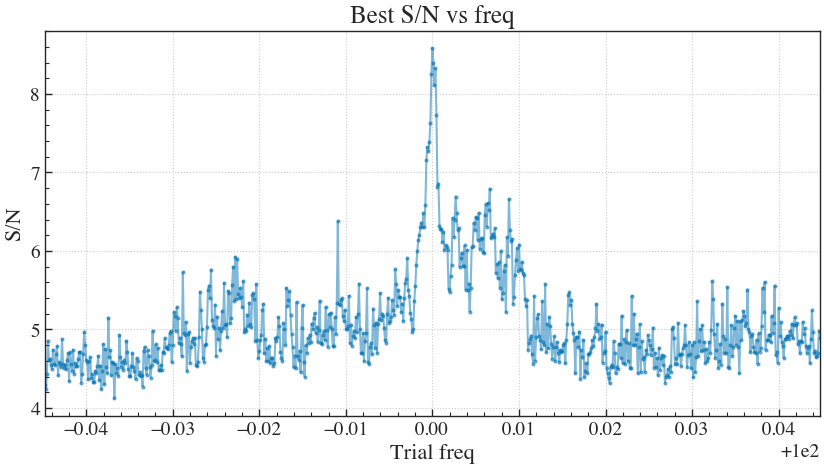

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

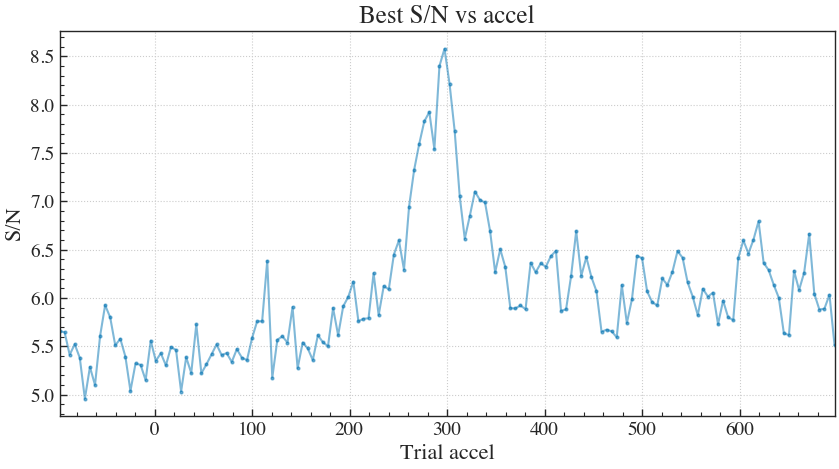

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

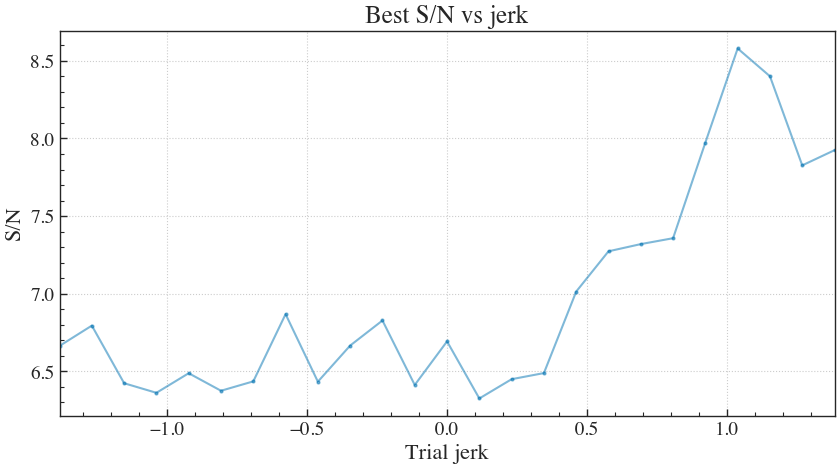

In [7]:
fig = pgram.plot_1d("jerk", figsize=(10, 5))
plt.show()

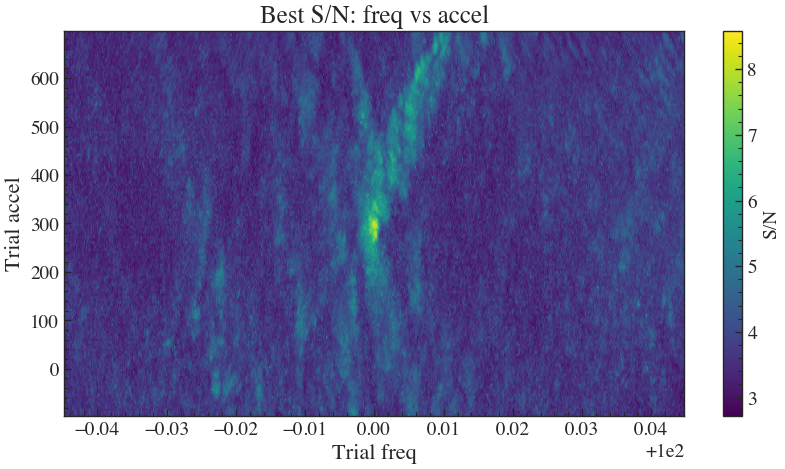

In [8]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()

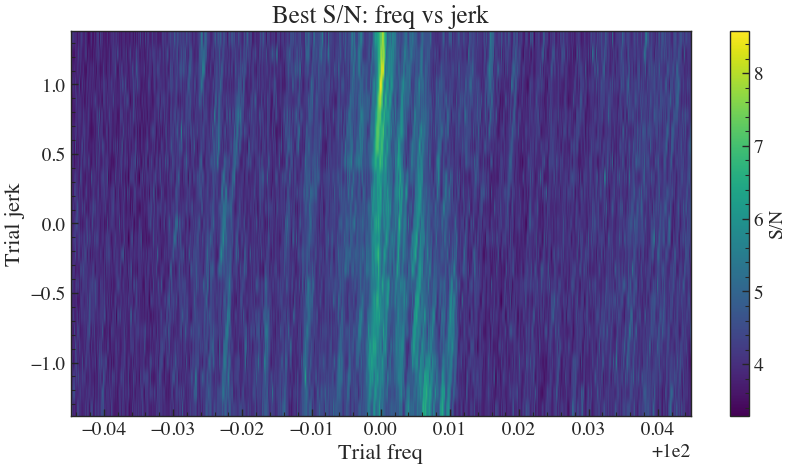

In [9]:
fig = pgram.plot_2d("freq", "jerk", figsize=(10, 5))
plt.show()

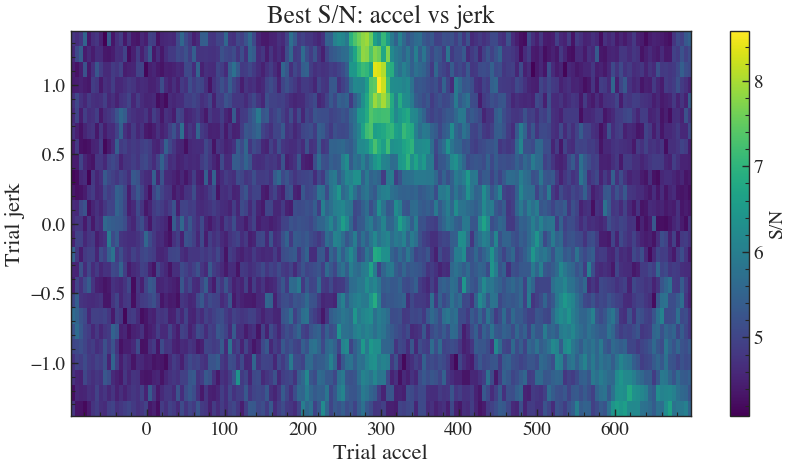

In [10]:
fig = pgram.plot_2d("accel", "jerk", figsize=(10, 5))
plt.show()

### FFT-SHIFT search

In [11]:
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=nbins,
    eta=eta,
    param_limits=p.limits,
    bseg_brute=bseg_brute,
    ducy_max=0.2,
    wtsp=1.5,
    use_fourier=True,
)
ffa_plan, pgram = ffa_search(tim_data, search_cfg, quiet=False, show_progress=False)

[2026-01-07 21:01:40.742] [info] FFA Memory Usage: 2.92 GB + 0.04 GB (coords)
[2026-01-07 21:01:40.870] [info] FFA::execute started
[2026-01-07 21:01:40.929] [info] FFA::initialize started
[2026-01-07 21:01:41.764] [info] FFA::initialize took 835 ms
[2026-01-07 21:01:42.324] [info] FFA::execute took 1454 ms


In [12]:
true_values = {
    "jerk": cfg.mod_kwargs["jerk"],
    "accel": cfg.mod_kwargs["acc"],
    "freq": cfg.freq,
}
print(pgram.get_indices_summary(true_values=true_values))
print(pgram.get_summary())

True param indices: (21, 76, 385)
Best param indices: (np.int64(21), np.int64(76), np.int64(385), np.int64(3))
Best S/N: 8.72
Best Period: 0.01
Best jerk: 1.0384615384615385
Best accel: 297.40223752258066
Best freq: 100.0
Best width: 4


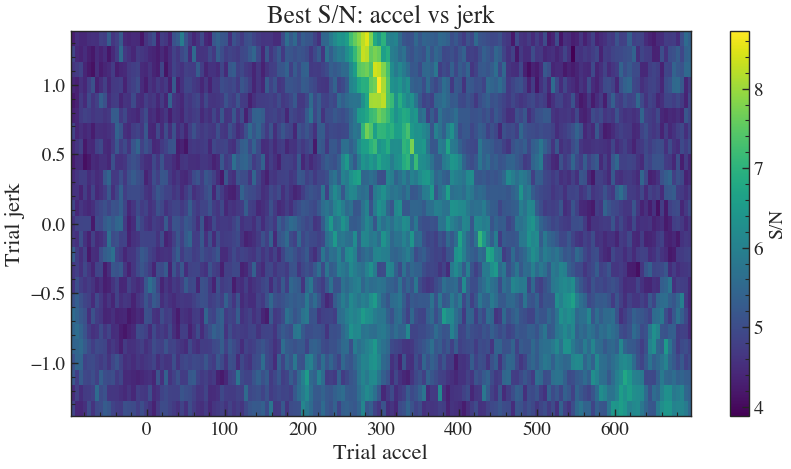

In [13]:
fig = pgram.plot_2d("accel", "jerk", figsize=(10, 5))
plt.show()